<a href="https://colab.research.google.com/github/dellaar/EDA_Penggunaan_Energi_Gedung_PT_Ashrae/blob/main/Analisis_Eksploratori_Data_Penggunaan_Energi_Gedung_PT_Ashrae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Understanding**

- Studi Kasus kali ini berasal dari Permasalahan Prediksi Penggunaan Energi Gedung dari PT Ashrae - American Society of Heating, Refrigerating and Air-Conditioning Engineers https://www.ashrae.org/about
- Data lengkap dan keterangan: https://www.kaggle.com/c/ashrae-energy-prediction/data
- Data berupa 3 buah file CSV: Informasi Tentang Gedung, Penggunaan Energi Gedung, dan Cuaca.
- Permasalahan utama dari kasus ini sebenarnya adalah forecasting/peramalan penggunaan energi. Akan tetapi di kesempatan ini kami hanya akan melakukan EDA pada data yang ada. Hasil EDA ini kelak akan digunakan untuk melakukan analisis lebih lanjut.


- **Variabel di Data Gedung "gd":**
site_id & building_id: id lokasi dan gedung
primary_use: Peruntukan Gedung
square_feet: Luas bangunan gedung
year_built: Tahun pembuatan gedung
floor_count: Banyaknya lantai yang ada di gedung.
- **Variabel di Data Energy Gedung "en" (selain building_id):**
meter : Jenis meter reading penggunaan energy gedung.
timestamp : Waktu saat pengukuran (per-jam)
meter_reading: Penggunaan energy.
- **Variabel di Data Cuaca "cu" (selain site_id & timestamp):**
air_temperature: suhu udara
cloud_coverage: ukuran berawan
dew_temperature: suhu dew (menbun?)
precip_depth_1_hr: precipitation (banyaknya air dari langit, karena sebab apapun)
sea_level_pressure: Tekanan permukaan laut.
wind_direction & wind_speed: arah dan kecepatan angin.

# **Load data csv dari google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/ashrae-energy-prediction.zip" -d "/content/data/"

Archive:  /content/drive/MyDrive/ashrae-energy-prediction.zip
  inflating: /content/data/building_metadata.csv  
  inflating: /content/data/sample_submission.csv  
  inflating: /content/data/test.csv  
  inflating: /content/data/train.csv  
  inflating: /content/data/weather_test.csv  
  inflating: /content/data/weather_train.csv  


# **Import Depedency**




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Melihat informasi dari Data Gedung**

### Mengetahui jumlah baris, kolom, dan tipe variabel dari Data Gedung

In [ ]:
gd = pd.read_csv('/content/data/building_metadata.csv', encoding='utf8')

# kita Ingin mengetahui jumlah baris, kolom, dan tipe variabel dari data building_metadata
N, P = gd.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabel df = ", type(gd))
gd

baris =  1449 , Kolom (jumlah variabel) =  6
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
...,...,...,...,...,...,...
1444,15,1444,Entertainment/public assembly,19619,1914.0,NaN
1445,15,1445,Education,4298,NaN,NaN
1446,15,1446,Entertainment/public assembly,11265,1997.0,NaN
1447,15,1447,Lodging/residential,29775,2001.0,NaN


Diketahui bahwa jumlah baris adalah 1449, jumlah kolom adalah 6, dan tipe variabelnya adalah Data Frame.

# **Melihat informasi dari Data Energi Gedung**

### Mengetahui jumlah baris, kolom dan tipe variabel dari Data Energi Gedung

In [ ]:
en = pd.read_csv('/content/data/train.csv', encoding='utf8')

N, P = en.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabel df = ", type(en))
en

baris =  20216100 , Kolom (jumlah variabel) =  4
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.000
1,1,0,2016-01-01 00:00:00,0.000
2,2,0,2016-01-01 00:00:00,0.000
3,3,0,2016-01-01 00:00:00,0.000
4,4,0,2016-01-01 00:00:00,0.000
...,...,...,...,...
20216095,1444,0,2016-12-31 23:00:00,8.750
20216096,1445,0,2016-12-31 23:00:00,4.825
20216097,1446,0,2016-12-31 23:00:00,0.000
20216098,1447,0,2016-12-31 23:00:00,159.575


Diketahui jumlah baris adalah 20216100, jumlah kolom adalah 4, dan tipe variabelnya adalah Data Frame.

# **Melihat informasi dari Data Cuaca**

### Mengetahui jumlah baris, kolom dan tipe variabel dari Data Cuaca

In [ ]:
cu = pd.read_csv('/content/data/weather_train.csv', encoding='utf8')

N, P = cu.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabel df = ", type(cu))
cu

baris =  139773 , Kolom (jumlah variabel) =  9
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...
139768,15,2016-12-31 19:00:00,3.0,NaN,-8.0,NaN,NaN,180.0,5.7
139769,15,2016-12-31 20:00:00,2.8,2.0,-8.9,NaN,1007.4,180.0,7.7
139770,15,2016-12-31 21:00:00,2.8,NaN,-7.2,NaN,1007.5,180.0,5.1
139771,15,2016-12-31 22:00:00,2.2,NaN,-6.7,NaN,1008.0,170.0,4.6


Diketahui jumlah baris adalah 139773, jumlah kolom adalah 9, dan tipe variabelnya adalah Data Frame.

# **Menggabungkan 3 Data menjadi 1 tabel (join)**

In [ ]:
join = pd.concat([gd, en, cu], axis = 1)
join

,site_id,building_id,primary_use,square_feet,year_built,floor_count,building_id,meter,timestamp,meter_reading,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0.0,0.0,Education,7432.0,2008.0,NaN,0,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0.0,1.0,Education,2720.0,2004.0,NaN,1,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0.0,2.0,Education,5376.0,1991.0,NaN,2,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0.0,3.0,Education,23685.0,2002.0,NaN,3,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0.0,4.0,Education,116607.0,1975.0,NaN,4,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,NaN,NaN,NaN,NaN,NaN,NaN,1444,0,2016-12-31 23:00:00,8.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20216096,NaN,NaN,NaN,NaN,NaN,NaN,1445,0,2016-12-31 23:00:00,4.825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20216097,NaN,NaN,NaN,NaN,NaN,NaN,1446,0,2016-12-31 23:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20216098,NaN,NaN,NaN,NaN,NaN,NaN,1447,0,2016-12-31 23:00:00,159.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Catatan: untuk code join ini hanya untuk menggabungkan 3 data menjadi 1 tabel. Akan tetapi untuk variable names data yang sama tidak masuk menjadi satu juga. Melainkan menjadi ada dua variable names di dalam tabel tersebut.

## Kita ingin mengetahui jumlah baris, kolom, dan tipe variabel dari data join.

In [ ]:
N, P = join.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
print("Tipe Variabel df = ", type(join))
join

baris =  20216100 , Kolom (jumlah variabel) =  19
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


,site_id,building_id,primary_use,square_feet,year_built,floor_count,building_id,meter,timestamp,meter_reading,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0.0,0.0,Education,7432.0,2008.0,NaN,0,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0.0,1.0,Education,2720.0,2004.0,NaN,1,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0.0,2.0,Education,5376.0,1991.0,NaN,2,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0.0,3.0,Education,23685.0,2002.0,NaN,3,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0.0,4.0,Education,116607.0,1975.0,NaN,4,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,NaN,NaN,NaN,NaN,NaN,NaN,1444,0,2016-12-31 23:00:00,8.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20216096,NaN,NaN,NaN,NaN,NaN,NaN,1445,0,2016-12-31 23:00:00,4.825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20216097,NaN,NaN,NaN,NaN,NaN,NaN,1446,0,2016-12-31 23:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20216098,NaN,NaN,NaN,NaN,NaN,NaN,1447,0,2016-12-31 23:00:00,159.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Diketahui bahwa jumlah baris adalah 20216100, jumlah kolom adalah 19, dan tipe variabelnya adalah Data Frame.

# **Preprocessing Data**

* Kami ingin mengetahui variabel apa saja yang ada di dalam Data yang sudah dijoin

In [ ]:
join.columns

Index(['site_id', 'building_id', 'primary_use', 'square_feet', 'year_built',
       'floor_count', 'building_id', 'meter', 'timestamp', 'meter_reading',
       'site_id', 'timestamp', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed'],
      dtype='object')

Diketahui variabel dalam Data join, yaitu site_id, primary_use, square_feet, year_built, floor_count, meter, timestamp, meter_reading, site_id, timestamp, air_temperature, cloud_coverage, dew_temperature, precip_depth_1_hr, sea_level_pressure, wind_direction, wind_speed.

* Kami akan menghilangkan beberapa kolom yang hanya berisi index dan NaN

In [ ]:
join.drop("building_id", axis=1, inplace=True)

# Drop kolom building_id karena hanya index
# drop untuk menghapus data yang tidak berguna
# inplace=True untuk tidak menambahkan data baru

Pada join.drop kita akan menghilangkan kolom building_id.

In [ ]:
join

,site_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0.0,Education,7432.0,2008.0,NaN,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0.0,Education,2720.0,2004.0,NaN,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0.0,Education,5376.0,1991.0,NaN,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0.0,Education,23685.0,2002.0,NaN,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0.0,Education,116607.0,1975.0,NaN,0,2016-01-01 00:00:00,0.000,0.0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,NaN,NaN,NaN,NaN,NaN,0,2016-12-31 23:00:00,8.750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20216096,NaN,NaN,NaN,NaN,NaN,0,2016-12-31 23:00:00,4.825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20216097,NaN,NaN,NaN,NaN,NaN,0,2016-12-31 23:00:00,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20216098,NaN,NaN,NaN,NaN,NaN,0,2016-12-31 23:00:00,159.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Maka, pada output terbaru. pada kolom building_id sudah tidak ada di output tersebut.

In [ ]:
# Drop baris yang ada NaN
join.dropna()

,site_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
107,1.0,Education,97532.0,2005.0,10.0,0,2016-01-01 00:00:00,91.2653,0.0,2016-01-05 11:00:00,11.1,0.0,6.7,0.0,1022.5,10.0,5.1
108,1.0,Education,81580.0,1913.0,5.0,0,2016-01-01 00:00:00,80.9300,0.0,2016-01-05 12:00:00,11.7,2.0,7.8,0.0,1023.1,20.0,7.2
109,1.0,Education,56995.0,1953.0,6.0,3,2016-01-01 00:00:00,0.0000,0.0,2016-01-05 13:00:00,12.2,4.0,7.8,0.0,1023.7,10.0,6.7
110,1.0,Education,27814.0,2006.0,8.0,0,2016-01-01 00:00:00,86.2283,0.0,2016-01-05 14:00:00,13.9,2.0,7.8,0.0,1024.4,10.0,8.8
111,1.0,Education,118338.0,1909.0,7.0,0,2016-01-01 00:00:00,167.3920,0.0,2016-01-05 15:00:00,15.6,4.0,8.9,0.0,1024.7,30.0,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,7.0,Education,333681.0,1938.0,3.0,0,2016-01-01 00:00:00,61.6248,0.0,2016-02-03 00:00:00,22.8,2.0,19.4,0.0,1018.8,100.0,4.6
795,7.0,Education,387500.0,1960.0,6.0,0,2016-01-01 00:00:00,30.0000,0.0,2016-02-03 03:00:00,21.1,2.0,19.4,0.0,1019.5,110.0,4.1
796,7.0,Education,226042.0,1965.0,2.0,0,2016-01-01 00:00:00,838.8000,0.0,2016-02-03 04:00:00,21.1,0.0,19.4,0.0,1019.3,130.0,4.1
798,7.0,Education,409028.0,1970.0,21.0,0,2016-01-01 00:00:00,34.0000,0.0,2016-02-03 06:00:00,21.1,2.0,19.4,0.0,1017.9,110.0,5.7


Dengan menggunakan dropna, maka input yang berisikan NaN akan hilang.

# **Mengoreksi Tipe Variabel Data Join**

In [ ]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 17 columns):
 #   Column              Dtype   
---  ------              -----   
 0   site_id             float64 
 1   primary_use         category
 2   square_feet         float64 
 3   year_built          float64 
 4   floor_count         float64 
 5   meter               int64   
 6   timestamp           object  
 7   meter_reading       float64 
 8   site_id             float64 
 9   timestamp           object  
 10  air_temperature     float64 
 11  cloud_coverage      float64 
 12  dew_temperature     float64 
 13  precip_depth_1_hr   float64 
 14  sea_level_pressure  float64 
 15  wind_direction      float64 
 16  wind_speed          float64 
dtypes: category(1), float64(13), int64(1), object(2)
memory usage: 2.4+ GB


Untuk primary_use pada output Dtype seharusnya menghasilkan 'category' pada pandas.

Lalu kami akan mengubah 'object' pada Dtype menjadi 'category'.

In [ ]:
join['primary_use'] = join['primary_use'].astype('category')
join['timestamp'] = join['timestamp'].astype('category')
join.dtypes

site_id                float64
primary_use           category
square_feet            float64
year_built             float64
floor_count            float64
meter                    int64
timestamp               object
meter_reading          float64
site_id                float64
timestamp               object
air_temperature        float64
cloud_coverage         float64
dew_temperature        float64
precip_depth_1_hr      float64
sea_level_pressure     float64
wind_direction         float64
wind_speed             float64
dtype: object

Maka, output dtype primary_use berubah menjadi category, tetapi pada dtype timestamp tetap menjadi object.

# **Menghilangkan Duplikasi di Data Join**

### Cek apakah ada duplikasi data di data join?

In [ ]:
print(join.shape)  # 20216100 baris dan 17 kolom
join.duplicated().sum()

(20216100, 17)


2966510

Ternyata pada data join terdapat 2966510 duplikasi.

### Kami akan menghapus data duplikat di atas

In [ ]:
join.drop_duplicates(inplace=True)
print(join.duplicated().sum())
print(join.shape)

0
(17249590, 17)


Maka, sudah tidak ada duplikasi di data join.

# **Memilih Variabel Tertentu pada Data Join**

### Kami akan memilih variabel yang bertipe numerik

In [ ]:
join_num = join.select_dtypes(include = ['float64', 'int64'])
join_num.head()

,site_id,square_feet,year_built,floor_count,meter,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0.0,7432.0,2008.0,NaN,0,0.0,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0.0,2720.0,2004.0,NaN,0,0.0,0.0,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0.0,5376.0,1991.0,NaN,0,0.0,0.0,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0.0,23685.0,2002.0,NaN,0,0.0,0.0,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0.0,116607.0,1975.0,NaN,0,0.0,0.0,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


### Kami akan memilih variabel yang bertipe category

In [ ]:
join_cat = join.select_dtypes(include = ['category'])
join_cat.head()

,primary_use
0,Education
1,Education
2,Education
3,Education
4,Education


# **Missing Value Data Join**

### Kita lihat secara umum nilai - nilai yang hilang

In [ ]:
print(join.isnull().sum())

site_id               17248141
primary_use           17248141
square_feet           17248141
year_built            17248915
floor_count           17249235
meter                        0
timestamp                    0
meter_reading                0
site_id               17109817
timestamp             17109817
air_temperature       17109872
cloud_coverage        17178990
dew_temperature       17109930
precip_depth_1_hr     17160106
sea_level_pressure    17120435
wind_direction        17116085
wind_speed            17110121
dtype: int64


### Menghitung persentase berapa banyak Null

In [ ]:
(join.isnull().sum()/len(join)).to_frame('persentase missing')

,persentase missing
site_id,0.999916
primary_use,0.999916
square_feet,0.999916
year_built,0.999961
floor_count,0.999979
meter,0.000000
timestamp,0.000000
meter_reading,0.000000
site_id,0.991897
timestamp,0.991897


### Kami akan menghilangkan missing value dengan beberapa cara

In [ ]:
X = join.dropna() # jika ada Missing Value minimal satu di salah satu kolom, maka baris di hapus
join.dropna(how='all') # jika ada Missing Value di semua kolom, maka baris di hapus
join.dropna(thresh=2) # jika ada Missing Value minimal di salah 2 kolom, maka baris di hapus
# inplace=True jika sangat yakin
join.dropna(inplace=True) # dropna untuk menghapus data yg tidak spesial

In [ ]:
print(join.isnull().sum())

site_id               0
primary_use           0
square_feet           0
year_built            0
floor_count           0
meter                 0
timestamp             0
meter_reading         0
site_id               0
timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
dtype: int64


Maka, sudah tidak ada missing value di setiap kolom

# **Statistika Deskriptif Join**

In [ ]:
join.describe()
# Mengeluarkan hasil statistika

,site_id,square_feet,year_built,floor_count,meter,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.0,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,4.087500,90498.300000,1956.550000,4.962500,0.07500,93.511135,0.0,13.243750,3.750000,7.370000,0.962500,1021.077500,143.250000,3.125000
std,1.485744,89209.765689,30.814636,3.384416,0.47133,180.849252,0.0,5.843374,2.940335,6.794607,4.135195,3.824107,133.120056,2.365924
min,1.000000,2010.000000,1903.000000,1.000000,0.00000,0.000000,0.0,1.700000,0.000000,-3.900000,-1.000000,1008.800000,0.000000,0.000000
25%,4.000000,22725.500000,1928.500000,2.000000,0.00000,16.249575,0.0,8.900000,2.000000,2.200000,0.000000,1018.775000,10.000000,1.500000
50%,4.000000,65922.000000,1959.000000,4.000000,0.00000,35.430000,0.0,13.300000,4.000000,7.800000,0.000000,1022.400000,100.000000,3.100000
75%,5.000000,118895.000000,1976.000000,7.000000,0.00000,86.782500,0.0,17.925000,6.000000,11.825000,0.000000,1023.900000,290.000000,4.725000
max,7.000000,409028.000000,2016.000000,21.000000,3.00000,1216.680000,0.0,25.600000,8.000000,19.400000,23.000000,1027.000000,360.000000,8.800000


Dari data diatas diketahui bahwa count dari seluruh variabel berjumlah 80.000.000

Rata-rata, standar deviasi, nilai minimum, kuartal 1, median, kuartal 3 dan nilai maksimum terbesar ada di variabel square_feet.

Rata-rata, standar deviasi, nilai minimum, kuartal 1, median, kuartal 3 dan nilai maksimum terkecil ada di variabel site_id.

In [ ]:
# Statistika Sederhana dari data "Numerik" nya
join.describe(include='all')

,site_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,80.000000,80,80.000000,80.000000,80.000000,80.00000,80,80.000000,80.0,80,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
unique,NaN,8,NaN,NaN,NaN,NaN,1,NaN,NaN,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Education,NaN,NaN,NaN,NaN,2016-01-01 00:00:00,NaN,NaN,2016-01-28 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,52,NaN,NaN,NaN,NaN,80,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.087500,NaN,90498.300000,1956.550000,4.962500,0.07500,NaN,93.511135,0.0,NaN,13.243750,3.750000,7.370000,0.962500,1021.077500,143.250000,3.125000
std,1.485744,NaN,89209.765689,30.814636,3.384416,0.47133,NaN,180.849252,0.0,NaN,5.843374,2.940335,6.794607,4.135195,3.824107,133.120056,2.365924
min,1.000000,NaN,2010.000000,1903.000000,1.000000,0.00000,NaN,0.000000,0.0,NaN,1.700000,0.000000,-3.900000,-1.000000,1008.800000,0.000000,0.000000
25%,4.000000,NaN,22725.500000,1928.500000,2.000000,0.00000,NaN,16.249575,0.0,NaN,8.900000,2.000000,2.200000,0.000000,1018.775000,10.000000,1.500000
50%,4.000000,NaN,65922.000000,1959.000000,4.000000,0.00000,NaN,35.430000,0.0,NaN,13.300000,4.000000,7.800000,0.000000,1022.400000,100.000000,3.100000
75%,5.000000,NaN,118895.000000,1976.000000,7.000000,0.00000,NaN,86.782500,0.0,NaN,17.925000,6.000000,11.825000,0.000000,1023.900000,290.000000,4.725000


In [ ]:
# Statistika Sederhana dari data "Numerik"-nya dengan cara ditranspose
join.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
site_id,80,NaN,NaN,NaN,4.0875,1.48574,1,4,4,5,7
primary_use,80,8,Education,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_feet,80,NaN,NaN,NaN,90498.3,89209.8,2010,22725.5,65922,118895,409028
year_built,80,NaN,NaN,NaN,1956.55,30.8146,1903,1928.5,1959,1976,2016
floor_count,80,NaN,NaN,NaN,4.9625,3.38442,1,2,4,7,21
meter,80,NaN,NaN,NaN,0.075,0.47133,0,0,0,0,3
timestamp,80,1,2016-01-01 00:00:00,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meter_reading,80,NaN,NaN,NaN,93.5111,180.849,0,16.2496,35.43,86.7825,1216.68
site_id,80,NaN,NaN,NaN,0,0,0,0,0,0,0
timestamp,80,80,2016-01-28 18:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Menyimpan Hasil Prepocessed Data Join**

### Karena sudah selesai dengan preprocessed, maka harus disimpan.

In [ ]:
join.to_csv("data/building_metadata_PreProcessed.csv", encoding='utf8')

# **Visualisasi Data Join**

Setelah dianalisis secara keseluruhan, lalu kami akan memvisualisasikannya sebagai berikut.

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import matplotlib.cm as cm
from collections import Counter
plt.style.use('bmh'); sns.set()

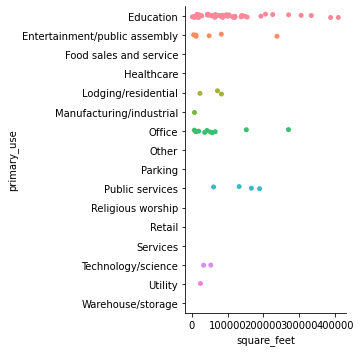

In [ ]:
b = sns.catplot(x="square_feet", y="primary_use", data=join)

Kami membandingkan antara variabel luas gedung dengan variabel peruntukkan gedung, hasil yang didapat dari catplot diatas adalah untuk gedung education memiliki gedung paling luas.

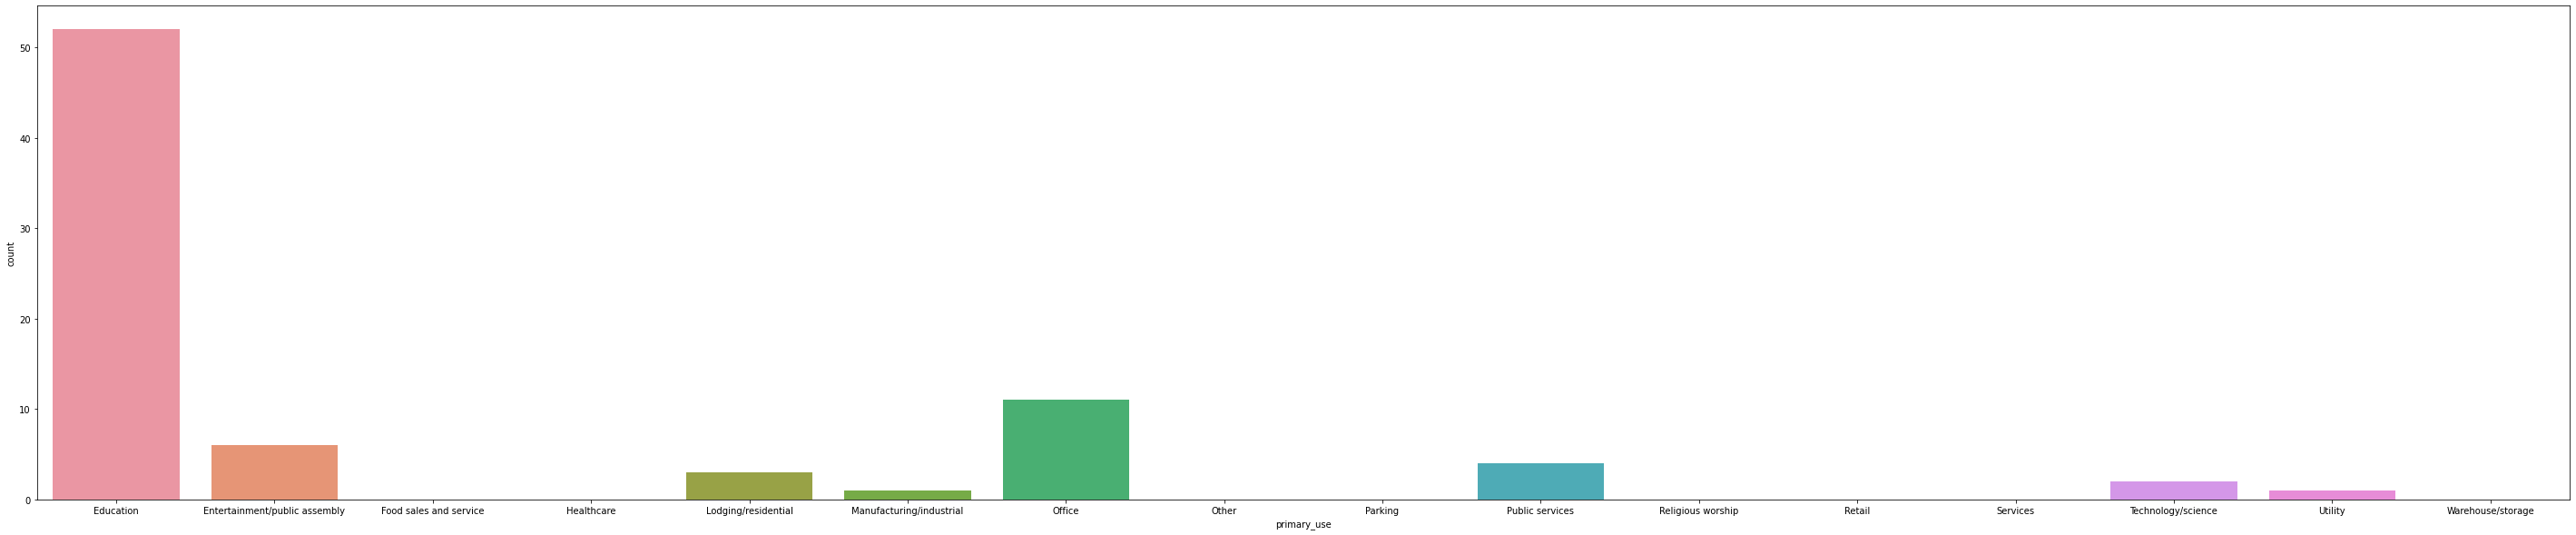

In [ ]:
plt.figure(figsize=(50,10))
p = sns.countplot(x="primary_use", data=join)

Pada data diatas peruntukkan gedung untuk education lebih banyak dibangun daripada gedung-gedung lainnya

In [ ]:
join.groupby(["primary_use", "floor_count"]).size().unstack()

floor_count,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,13.0,14.0,21.0
primary_use,,,,,,,,,,,,,,
Education,2,9,4,9,7,3,4,5,3,2,1,1,1,1
Entertainment/public assembly,2,1,0,1,1,1,0,0,0,0,0,0,0,0
Food sales and service,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Healthcare,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Lodging/residential,0,0,1,1,0,0,0,1,0,0,0,0,0,0
Manufacturing/industrial,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Office,2,4,2,1,1,0,0,1,0,0,0,0,0,0
Other,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Parking,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Data diatas menunjukkan jumlah lantai pada setiap gedung yang dibangun. Gedung dengan dua lantai adalah gedung yang paling banyak dibangun

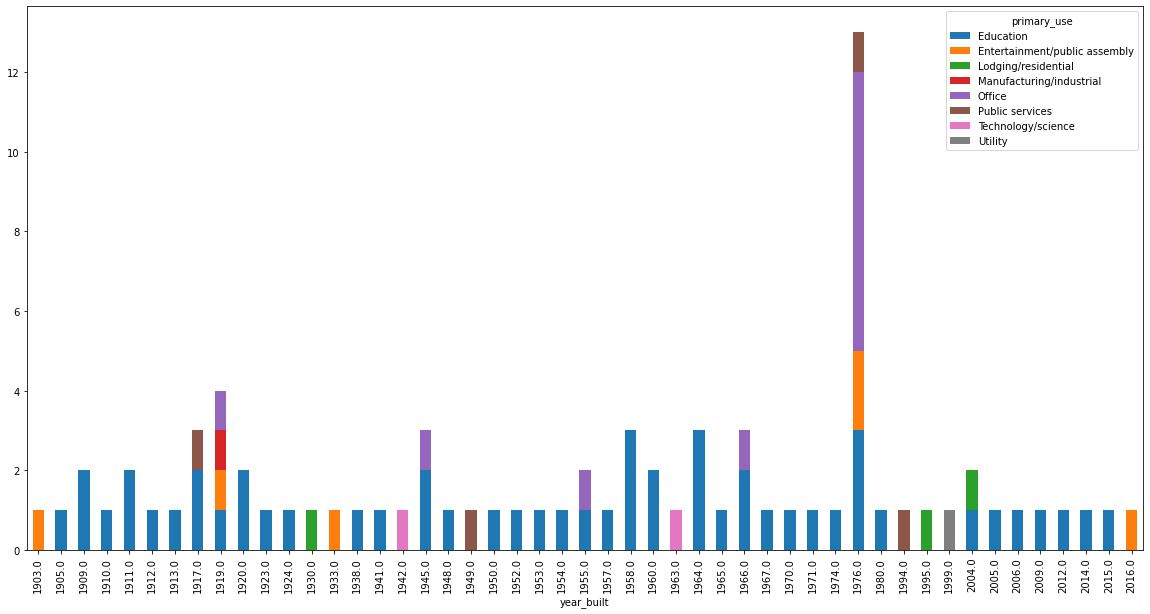

In [ ]:
CT = pd.crosstab(index=join["year_built"], columns=join["primary_use"])
p = CT.plot(kind="bar", figsize=(20,10), stacked=True)

Dari data dapat kita lihat tahun-tahun gedung dibuat dan pada tahun 1976 pembangunan gedung mengalami kenaikan. Dimana gedung untuk education yang paling banyak dibangun

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


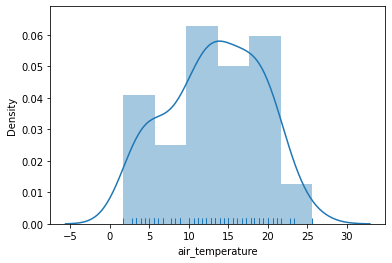

In [ ]:
p = sns.distplot(join['air_temperature'], kde=True, rug=True)

In [ ]:
# Misal dengan asumsi data berdistribusi normal
# dan menggunakan 95% confidence interval di sekitar variabel

df = np.abs(join.air_temperature - join.air_temperature.mean())<=(2*join.air_temperature.std())
# mu-2s<x<mu+2s
print(df.shape)
df.head()

(80,)


107    True
108    True
109    True
110    True
111    True
Name: air_temperature, dtype: bool

In [ ]:
join2 = join[df] # Data tanpa outliers
print(join.shape, join.shape)
# Perhatikan disini sengaja data yang telah di remove outliernya
# disimpan dalam variabel baru "join2"
# Jika datanya besar hati-hati melakukan hal ini

(80, 17) (80, 17)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


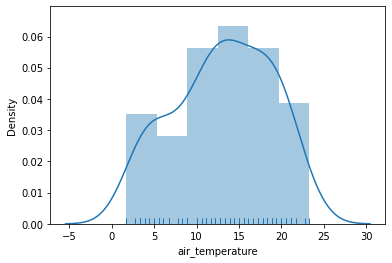

In [ ]:
p = sns.distplot(join2['air_temperature'], kde=True, rug=True)

Dari distplot diatas dapat disimpulkan bahwa rata-rata suhu udara berada di 13 derajat celcius dan memiliki standar deviasi yang menyebar.

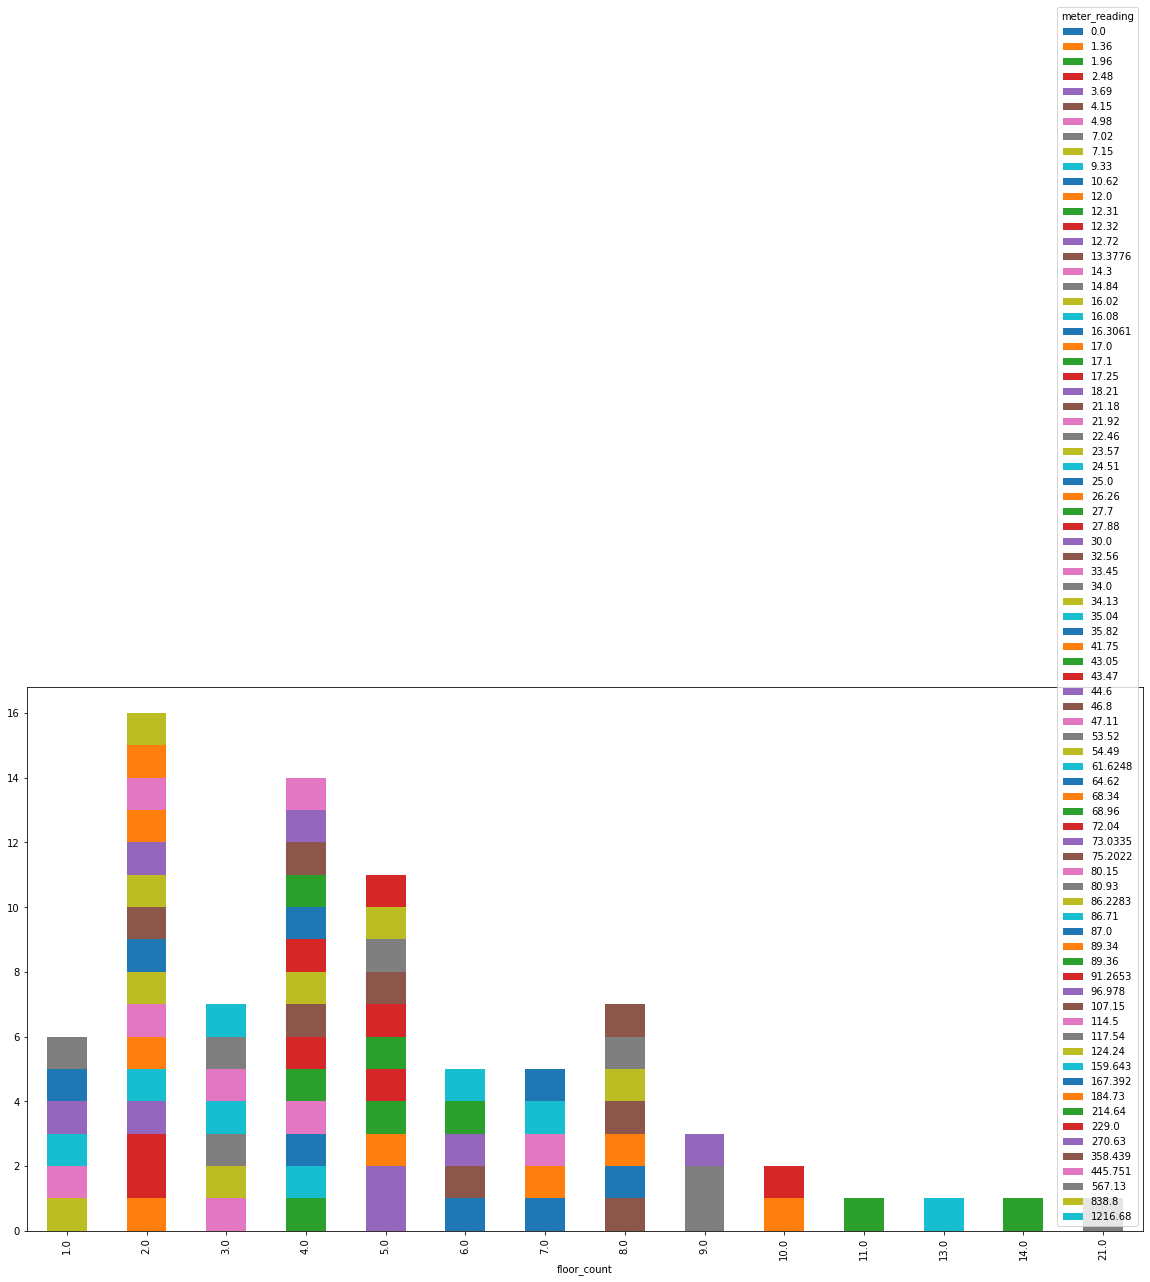

In [ ]:
CT = pd.crosstab(index=join["floor_count"], columns=join["meter_reading"])
q = CT.plot(kind="bar", figsize=(20,10), stacked=True)

Dari plot diatas dapat disimpulkan bahwa lantai 2 menggunakan energi yang paling besar.

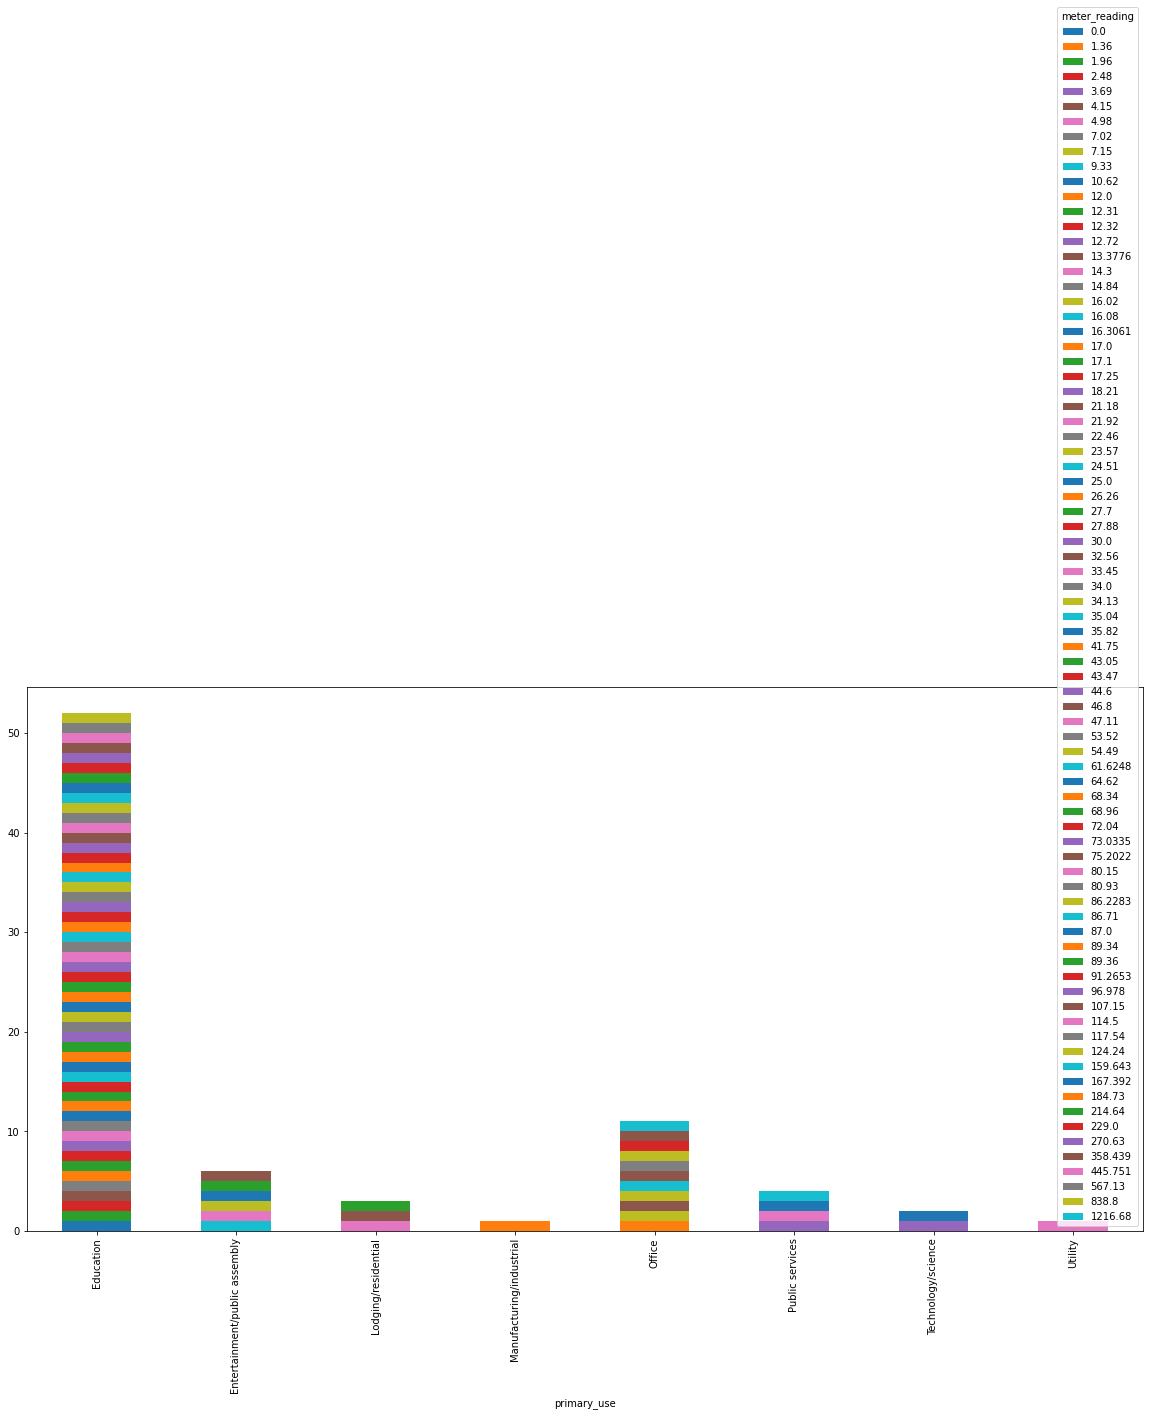

In [ ]:
CT = pd.crosstab(index=join["primary_use"], columns=join["meter_reading"])
t = CT.plot(kind="bar", figsize=(20,10), stacked=True)

Dapat disimpulkan dari plot diatas bahwa gedung education penggunaan energinya lebih besar dari gedung office dan gedung-gedung lainnya.

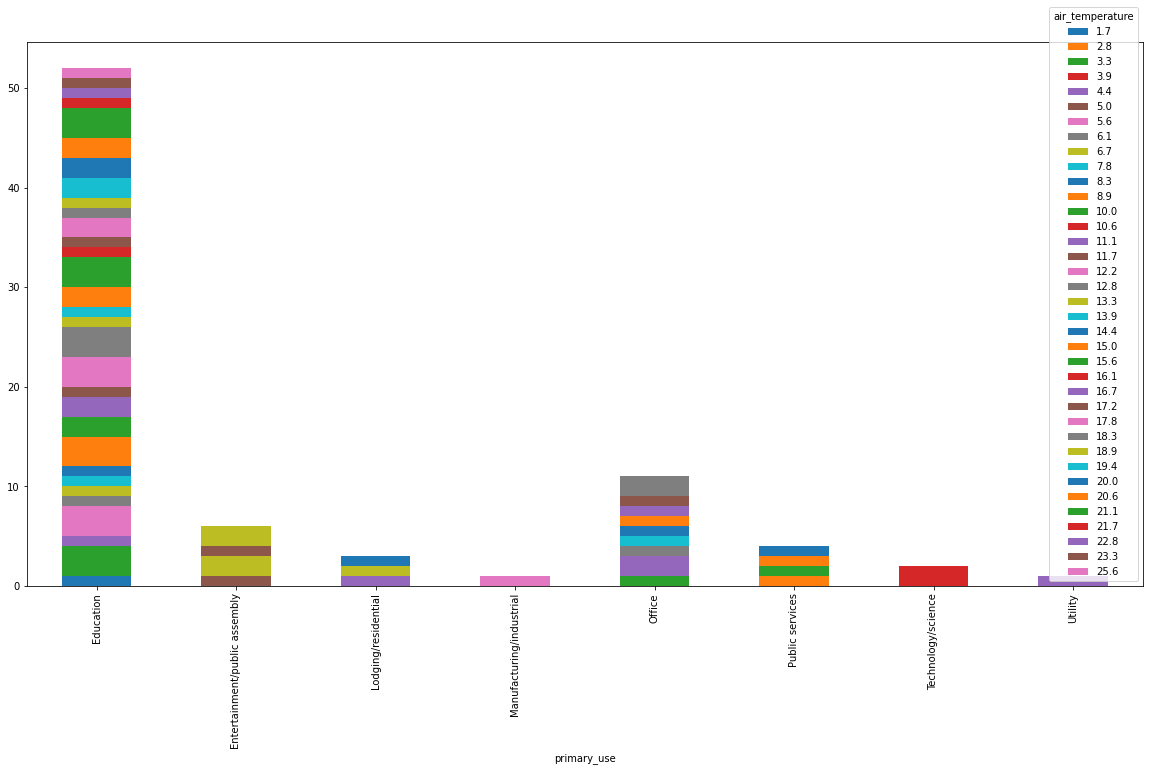

In [ ]:
CT = pd.crosstab(index=join["primary_use"], columns=join["air_temperature"])
q = CT.plot(kind="bar", figsize=(20,10), stacked=True)

Fungsi gedung edukasi memiliki suhu udara yang paling tinggi.